In [133]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import json
from datetime import datetime

s = json.load( open("fbb_matplotlibrc.json"))
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [134]:
df=pd.read_csv(open('201501-citibike-tripdata.csv'))
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [143]:
df['time']=pd.to_datetime(df['starttime'])
df['hour']=df['time'].dt.hour

In [136]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['hour'] >= 6) & (df['hour'] < 18)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['hour'] < 6) | (df['hour'] >= 18)]

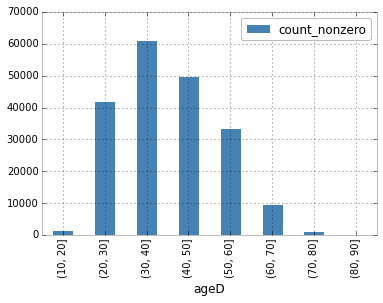

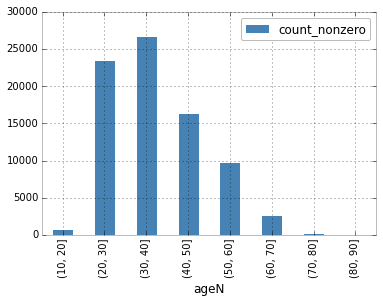

In [137]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.001005
(20, 30]       0.083265
(30, 40]       0.109906
(40, 50]       0.064822
(50, 60]       0.018415
(60, 70]       0.002698
(70, 80]       0.000011
(80, 90]       0.000000


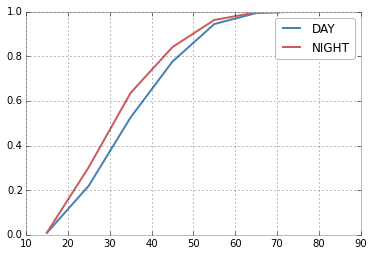

In [138]:
csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "DAY")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "NIGHT")
pl.legend()

In [139]:
import scipy.stats

In [140]:
ks=scipy.stats.ks_2samp(df.ageD, df.ageN)
print ks

(0.41810248220989527, 0.0)


###Since the p-value=0, we reject the null hypothesis.

In [121]:
scipy.stats.describe(df.ageD.dropna())

DescribeResult(nobs=199657, minmax=(16.0, 116.0), mean=40.849166320239213, variance=135.5965993695857, skewness=0.5139516663149561, kurtosis=0.1462216445293878)

In [122]:
scipy.stats.describe(df.ageN.dropna())

DescribeResult(nobs=80267, minmax=(16.0, 116.0), mean=38.057196606326386, variance=124.37338861261748, skewness=0.7630652830007053, kurtosis=0.3737974699742601)

In both pearson and spearman test:

Parameters:	
x : 1D array
y : 1D array the same length as x.
The lengths of both arrays must be > 2.

In [144]:
np.random.seed(999)
day=np.random.choice(df.ageD.dropna(),len(df.ageN.dropna()))
night=df.ageN.dropna()
sp=scipy.stats.pearsonr(np.sort(day),np.sort(night))
print sp

(0.99521719047198232, 0.0)


In [145]:
sm=scipy.stats.spearmanr(np.sort(day),np.sort(night))
print sm

(0.99915148947849275, 0.0)


###From the plot, we can easily observe that the cdf of the 2 age groups are quite similar. However, when running the KS test, we reject the null hyputhesis. When doing Pearson test and Spearman test, I try to put the age of each group in order. After doing that, the pearson coefficient and the spearman coefficient are close to 1.